In [ ]:
import pandas
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import os
import librosa
import librosa.display
from pathlib import Path

os.chdir("hunt-cry-ai/") 
print("Current directory:", os.getcwd())


FileNotFoundError: [Errno 2] No such file or directory: 'hunt-cry-ai'

In [ ]:
df = pandas.read_csv("data/labels.csv")
print(f"Total clips: {len(df)}")
print(f"Distribution:\n{df['class'].value_counts()}")

file_path = df.loc[0, 'filepath']          
full_path = f"data/{file_path}"
print("Full path:", full_path)

df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/labels.csv'

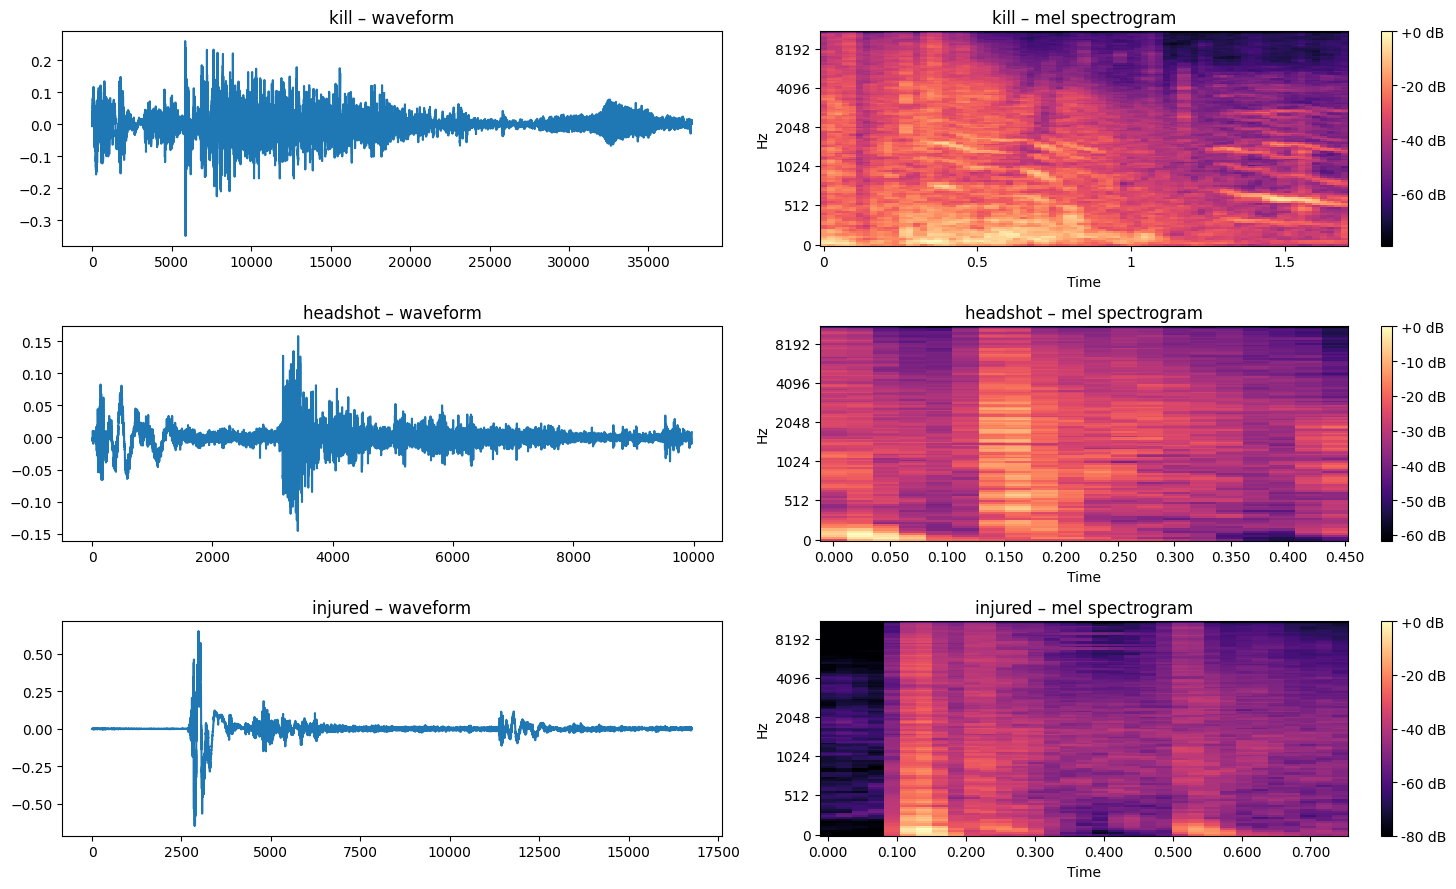

In [7]:

examples = {
    "kill": "data/raw/kill/bow_man_kill_01.wav",
    "headshot": "data/raw/headshots/headshot.wav",
    "injured": "data/raw/injured/silencer_man_injured.wav",
}

plt.figure(figsize=(15, 9))

for i, (label, path) in enumerate(examples.items(), start=1):
    y, sr = librosa.load(path, sr=22050, duration=2.0)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    plt.subplot(3, 2, 2*i-1)
    plt.plot(y)
    plt.title(f"{label} – waveform")

    plt.subplot(3, 2, 2*i)
    librosa.display.specshow(mel_db, sr=sr, x_axis="time", y_axis="mel")
    plt.title(f"{label} – mel spectrogram")
    plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()
